In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv(r"C:\Users\TOMORI\Desktop\data science\data-science-class\Housing_dataset_train.csv")

In [3]:
df.head(10)

,ID,loc,title,bedroom,bathroom,parking_space,price
0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565
1,2748,Ondo,Apartment,NaN,2.0,4.0,1672416.689
2,9261,Ekiti,NaN,7.0,5.0,NaN,3364799.814
3,2224,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756
4,10300,Kogi,Terrace duplex,NaN,5.0,6.0,2600700.898
5,1733,Borno,Mansion,NaN,1.0,3.0,1341750.867
6,7892,Kwara,Bungalow,NaN,4.0,4.0,2125789.778
7,3003,Katsina,Penthouse,3.0,3.0,5.0,2043107.592
8,555,Osun,Semi-detached duplex,NaN,1.0,2.0,1219453.877
9,3085,Kaduna,Penthouse,NaN,3.0,3.0,2710664.872


In [4]:
df.shape

(14000, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             14000 non-null  int64  
 1   loc            12187 non-null  object 
 2   title          12278 non-null  object 
 3   bedroom        12201 non-null  float64
 4   bathroom       12195 non-null  float64
 5   parking_space  12189 non-null  float64
 6   price          14000 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 765.8+ KB


In [9]:
df0= df.iloc[:, 3:]

In [10]:
df0.head()

,bedroom,bathroom,parking_space,price
0,2.0,2.0,1.0,1149999.565
1,NaN,2.0,4.0,1672416.689
2,7.0,5.0,NaN,3364799.814
3,5.0,2.0,4.0,2410306.756
4,NaN,5.0,6.0,2600700.898


In [11]:
df0.isnull().sum()

bedroom          1799
bathroom         1805
parking_space    1811
price               0
dtype: int64

In [13]:
df0.describe()

,bedroom,bathroom,parking_space,price
count,14000.000000,12195.000000,12189.000000,1.400000e+04
mean,4.268571,3.134235,3.169825,2.138082e+06
std,2.281249,2.035950,1.599415,1.083057e+06
min,1.000000,1.000000,1.000000,4.319673e+05
25%,3.000000,1.000000,2.000000,1.393990e+06
50%,4.000000,2.000000,3.000000,1.895223e+06
75%,6.000000,5.000000,4.000000,2.586699e+06
max,9.000000,7.000000,6.000000,1.656849e+07


In [12]:
df0['bedroom'].fillna(df0['bedroom'].median(), inplace=True)

In [14]:
df0['bathroom'].fillna(round(df0['bathroom'].mean()), inplace= True)

In [15]:
df0['parking_space'].fillna(df0['parking_space'].median(), inplace= True)

In [17]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedroom        14000 non-null  float64
 1   bathroom       14000 non-null  float64
 2   parking_space  14000 non-null  float64
 3   price          14000 non-null  float64
dtypes: float64(4)
memory usage: 437.6 KB


In [18]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [19]:
scaler= MinMaxScaler()

In [20]:
df1=pd.DataFrame(scaler.fit_transform(df0), columns=df0.columns)

In [21]:
df1.head()

,bedroom,bathroom,parking_space,price
0,0.125,0.166667,0.0,0.044497
1,0.375,0.166667,0.6,0.076872
2,0.750,0.666667,0.4,0.181751
3,0.500,0.166667,0.6,0.122600
4,0.375,0.666667,1.0,0.134399


In [22]:
df1.describe()

,bedroom,bathroom,parking_space,price
count,14000.000000,14000.000000,14000.000000,14000.000000
mean,0.408571,0.352821,0.429571,0.105730
std,0.285156,0.316783,0.298693,0.067118
min,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.166667,0.200000,0.059618
50%,0.375000,0.333333,0.400000,0.090680
75%,0.625000,0.500000,0.600000,0.133531
max,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:xlabel='price', ylabel='bedroom'>

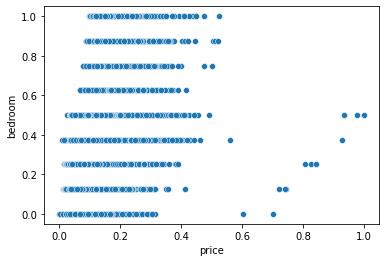

In [23]:
sns.scatterplot(data= df1, x= "price", y="bedroom")

In [24]:
X= df1.iloc[:, :3]
y= df1.iloc[:, 3]

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train,y_test= train_test_split(X, y, test_size= .20, random_state=2)

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
model= LinearRegression() 

In [29]:
model.fit(X_train, y_train)

LinearRegression()

In [30]:
y_pred= model.predict(X_test)

In [32]:
from sklearn.metrics import mean_squared_error as mse

In [33]:
mse(y_test, y_pred)

0.0033314171108797704